<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

# Ex1: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a curret clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitud 1 pA and duration 10 ms. Then do the following:
    
<font size="3">- instead of injecting current at the middle of the section, inject current simultaneously at the two endpoints
        
<font size="3">- without changing the morphology, increase the voltage attenuation from the center of the section to the ends. 
     

<font size="3">Plot the result for each of the previous points and explain what is happening in each situation. In this exercise is important to keep the previous values each time you change some parameter.
If not, you won’t be able to compare them.
    
[0.5 points]

In [9]:
# Importing Libraries

%matplotlib inline
from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

In [154]:
# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay, amplitude, duration):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })
    return stim

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })
    return vec

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })
    return vec

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst, idictlst, vmax = 70, imax = 2):
    plt.figure()
    plt.title('currents')
    plt.ylim((-0.01,imax))
    plt.xlabel('t (ms)')
    plt.ylabel('I (nA)')
    for i, idict in enumerate(idictlst):
        plt.plot(t,idict['vec'],label=('Soma'+str(i)))
    plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
#     plt.ylim((-71,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    for vdict in vdictlst:
        plt.plot(t,vdict['vec'],label='Soma(0.5)')
    plt.legend(loc=1)

In [155]:
When plotting the recorded current and voltage in the middle of the soma (soma(0.5)) without any voltage attenuation, the steepness of linear voltage response is the combination of both injections.  Indeed, when we delay one of the injection compared to the other, we notice that the voltage ramps is divided into two steepness and there is coherent dissymmetry.


SyntaxError: invalid syntax (<ipython-input-155-f4835ea22197>, line 1)

In [156]:
# Create a section 
soma = h.Section()
soma.Ra = 1
soma.L = 100
soma.diam = 10
soma.cm = 1

In [157]:
# Inject a current step into the soma
reset()
delay = 1 #ms
amp = 1 #nA
dur = 10 #ms
stim_1 = iclamp(soma(0), delay, amp, dur)
stim_2 = iclamp(soma(1), delay, amp, dur)

In [158]:
print(stimdictlst)

[{'stim': IClamp[63], 'loc': '__nrnsec_000000c95cab1630(0)'}, {'stim': IClamp[64], 'loc': '__nrnsec_000000c95cab1630(1)'}]


In [159]:
vec_v = vrecord(soma(0.5))

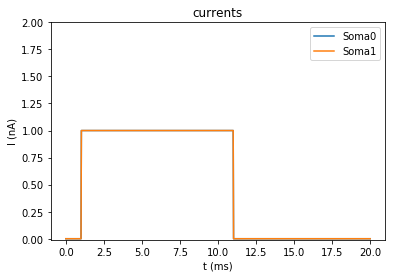

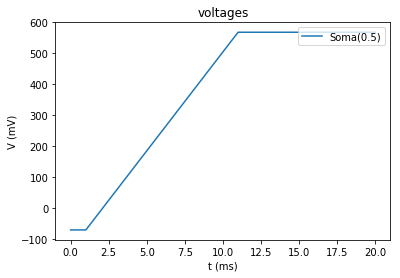

In [160]:
# Simulate and plot
v_init = -70
t_stop = 20
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

# Ex 2. Action Potential Propagation. 

<font size='3'>Create a neuron with a soma, an axon with three sections, and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma, axon and the dendrite, but not to the branches. You can use the parameters from tutorial 03. Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma and the branches are recorded at the far end. Choose the best stimulation parameters to see the signal attenuation in the branches.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the signal propagation from the soma to the branches?
    
<font size='3'>- What happen if the active properties of the dendrite are removed?
    
<font size='3'>- Record the potential at the end of the axon. What happens if the active properties of the middle axonal section are removed? What could this represent biologically?
    
[1.5 points]

# Ex 3. Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instanciate it as it is done on tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) in the middle. Play arround with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot some results that would help you to explain: what is dendritic signal integration? and in your opinion, what is the importance of this in biology?
    
<font size="3">What happens when you stimulate only the basal or only the apical dendrites? Why is this?
    
[3 points]

# Ex 4. Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instanciate it as it is done on tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<font size="3">What would you expect in terms of attenuation? Would you expect the signal to be more attenuated in the axon or in the dendrites? Why? Change the properties of some of the sections, such that you get a different result. Explain why this works
    
[1.75 points]